In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df_wine_quality = pd.read_csv('winequality-red.csv')

In [3]:
df_wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dwq_norm = df_wine_quality[["volatile acidity","citric acid", "alcohol","sulphates", "quality"]].copy()#taking the four features that have highest correlation with the target variable

In [5]:
df_wine_quality['quality'].min()

3

In [6]:
#normalizing the dataframe
for col in range(dwq_norm.shape[1]):
  for row in range(dwq_norm.shape[0]):
    dwq_norm.iloc[row,col] = (dwq_norm.iloc[row,col]-dwq_norm.iloc[:,col].min())/(dwq_norm.iloc[:,col].max()-dwq_norm.iloc[:,col].min())

In [7]:
dwq_norm

,volatile acidity,citric acid,alcohol,sulphates,quality
0,0.397260,0.00,0.153846,0.137725,0.400000
1,0.520548,0.00,0.654147,0.291190,0.605263
2,0.438356,0.04,0.654147,0.275080,0.605263
3,0.109589,0.56,0.654147,0.237492,0.736842
4,0.401528,0.00,0.627021,0.226752,0.605263
...,...,...,...,...,...
1594,0.586223,0.08,0.936630,0.516663,0.823256
1595,0.534501,0.10,1.000000,0.723808,1.000000
1596,0.493123,0.13,1.000000,0.712300,1.000000
1597,0.632773,0.12,0.926241,0.666268,0.823256


In [8]:
features = ["volatile acidity","citric acid", "alcohol","sulphates"]

In [9]:
x_df = dwq_norm[features] #taking the x dataframe 

In [10]:
y_df = dwq_norm['quality'] #taking the y dataframe

In [11]:
x_train = np.zeros((int(x_df.shape[0]*0.8),x_df.shape[1]+1)) # making a xtrain matrix from first 80% of X dataframe
for i in x_train:
  i[0]=1
for i in range(x_train.shape[0]):
  for j in range(1,x_train.shape[1]):
    x_train[i][j]=x_df.iloc[i][j-1]
y_train = np.asarray(list(y_df)[0:int(x_df.shape[0]*0.8)]) # making a y list of values from first 80% of Y dataframe

In [28]:
#np.shape(np.matmul(x_train.T,x_train))
lmda = 0.2*np.identity(np.shape(np.matmul(x_train.T,x_train))[0]) #lammda identity matrix
lmda
#w = np.matmul((np.matmul(np.linalg.inv(np.matmul(x_train.T,x_train)),x_train.T)),y_train)

array([[0.2, 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0. ],
       [0. , 0. , 0. , 0. , 0.2]])

In [29]:
w = np.matmul((np.matmul(np.linalg.inv(np.matmul(x_train.T,x_train)+lmda),x_train.T)),y_train) # using Ridge equation

In [30]:
w

array([ 0.35976063, -0.22411475,  0.00982858,  0.49098641,  0.12160322])

In [31]:
x_test = np.zeros((x_df.shape[0]-int(x_df.shape[0]*0.8),x_df.shape[1]+1)) # taking last 20% of X dataframe 
for i in x_test:
  i[0]=1
for i in range(x_test.shape[0]):
  for j in range(1,x_test.shape[1]):
    x_test[i][j]=x_df.iloc[i+int(x_df.shape[0]*0.8)][j-1]
y_test = np.asarray(list(y_df)[int(x_df.shape[0]*0.8):int(x_df.shape[0])]) # taking the last 20% of Y dataframe

In [32]:
rmse_train = np.sqrt((np.sum((y_train-np.dot(x_train,w))**2))/x_train.shape[0]) # taking rmse of train dataset

In [33]:
rmse_train

0.08707244156506859

In [34]:
rmse_test = np.sqrt((np.sum((y_test-np.dot(x_test,w))**2))/x_test.shape[0]) # rmse of test dataset
rmse_test

0.09983210553959837

In [55]:
loss_train = np.sum((y_train-np.dot(x_train, w))**2)+0.2*(w.T@w) # Ridge loss of train dataset
loss_train

9.784000638942029

In [43]:
loss_test = np.sum((y_test-np.dot(x_test,w))**2)+0.2*(w.T@w) # Ridge loss of test dataset
loss_test

3.276385121361451

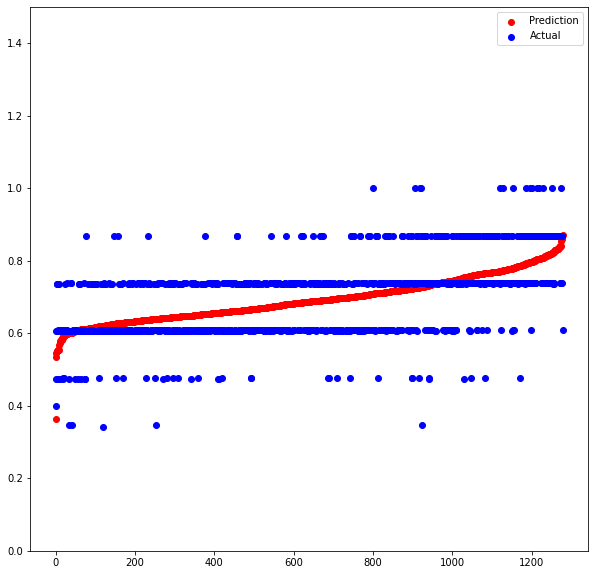

In [39]:
fig= plt.figure(figsize=(10,10))
ypred = list(map(lambda x: x@w, x_train))

index = np.argsort(ypred) #sorting predictions to obtain smooth line 
xplot = np.arange(len(ypred))
yplot = list(map(lambda x : ypred[x],index))
yplot_train = list(map(lambda x: y_train[x], index))
#plt.scatter(xplot,yplot)

plt.scatter(xplot,yplot, color = 'r', label = "Prediction")
plt.scatter(xplot, yplot_train, color='b' , label = "Actual") # plotting corresponding actual data
plt.ylim(0,1.5)
plt.legend()
plt.show()

## BONUS

In [50]:
alpha = 0.00001
lam = 0.2
w_gradient = np.ones(5) # initializing w gradient as array of ones 
# checking l2 norm of gradient J(w) below a particular value to stop the gradient descent
while np.linalg.norm((-2*np.matmul(x_train.T, y_train))+(2*np.matmul(np.matmul(x_train.T, x_train), w_gradient))+(2*lam * w_gradient)) > 0.001:
  
  w_gradient -= alpha*((-2*np.matmul(x_train.T,y_train))+(2*np.matmul(np.matmul(x_train.T,x_train),w_gradient))+(2*lam *w_gradient))#update w gradient 

In [51]:
rmse_test = np.sqrt((np.sum((y_test-np.dot(x_test,w_gradient))**2))/x_test.shape[0])
rmse_test

0.09983087574639984

In [52]:
rmse_train = np.sqrt((np.sum((y_train-np.dot(x_train,w_gradient))**2))/x_train.shape[0])
rmse_train

0.087072438340697

In [54]:
loss_train = np.sum((y_train-np.dot(x_train,w_gradient))**2)+ lam*(w_gradient.T@w_gradient)
loss_train

9.784000685764532

In [53]:
loss_test = np.sum((y_test-np.dot(x_test,w_gradient))**2)+ lam*(w_gradient.T@w_gradient)
loss_test

3.276307312215992